### Kenya's Census Data Analysis
Kenya just concluded the census activity. In an anticipation for the outcome of this exercise, I look at the Kenya's population stats in 2009. It would be interesting to see what has changed since then and make some inferences about the rate of population growth in the next decade.<br>
The data used here is from open data Kenya portal.

### Load Modules & Dataset

In [2]:
# import modules
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [3]:
# Load data & Kenya's administration boundaries shapefile
pop_data = pd.read_csv("Data/Summary_Population_Distribution_By_District.csv")
ke_district_boundaries = gpd.read_file("Shapefiles/ke_district_boundaries.shp")

In [4]:
# overview
pop_data.head()

,District,rural/urban,Male,Female,Total,Households,Area_in_Sq_Km,_Household_Density_,Population_Density,Gender_Index,County,Location,Location_1,Province,OBJECTID
0,NAIROBI WEST,Rural,0,0,0,0,0.00,NaN,NaN,NaN,NAIROBI,"NAIROBI WEST, NAIROBI Kenya\n",NaN,36.799202,0
1,NAIROBI EAST,Rural,0,0,0,0,0.00,NaN,NaN,NaN,NAIROBI,"NAIROBI EAST, NAIROBI Kenya\n",NaN,36.967484,1
2,NAIROBI NORTH,Rural,0,0,0,0,0.00,NaN,NaN,NaN,NAIROBI,"NAIROBI NORTH, NAIROBI Kenya\n",NaN,36.891126,2
3,WESTLANDS,Rural,0,0,0,0,0.00,NaN,NaN,NaN,NAIROBI,"WESTLANDS, NAIROBI Kenya\n",NaN,36.788256,3
4,NYANDARUA NORTH,Rural,106111,109785,215896,52503,1394.69,37.64,109861.0821,1.034624,CENTRAL,"NYANDARUA NORTH, CENTRAL Kenya\n",NaN,36.423431,4


In [5]:
# Districts shapefile
ke_district_boundaries.head()

,DISTNAME,geometry
0,BARINGO,POLYGON ((36.27933883666992 0.6243004202842712...
1,BOMET,POLYGON ((35.40040969848633 -0.651987552642822...
2,BONDO,(POLYGON ((34.26028060913086 -0.34618946909904...
3,BUNGOMA,"POLYGON ((34.3726921081543 0.7700766324996948,..."
4,BURET,POLYGON ((35.39651870727539 -0.641618132591247...


#### Quick stats

In [6]:
pop_data.fillna(value=0)
pop_data.describe()

,Male,Female,Total,Households,Area_in_Sq_Km,_Household_Density_,Population_Density,Gender_Index,Location_1,Province,OBJECTID
count,316.000000,316.000000,3.160000e+02,316.000000,316.000000,290.000000,290.000000,290.000000,0.0,316.000000,316.000000
mean,60735.626582,61448.224684,1.221839e+05,27746.689873,1839.598608,601.943552,67302.792308,1.014161,NaN,36.583759,157.500000
std,67904.042331,67267.211785,1.350177e+05,37068.244631,4620.038177,995.453048,67673.386334,0.079238,NaN,1.827359,91.365566
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.400000,486.702929,0.770335,NaN,34.020468,0.000000
25%,12418.250000,12040.250000,2.439650e+04,6043.250000,32.182500,36.470000,21699.871322,0.980986,NaN,34.902118,78.750000
50%,45400.000000,46362.500000,9.150750e+04,19699.500000,218.730000,147.170000,54714.707670,1.023679,NaN,36.537310,157.500000
75%,88108.250000,90530.750000,1.788535e+05,36117.500000,1015.130000,920.395000,98362.057540,1.065183,NaN,37.625228,236.250000
max,582554.000000,561862.000000,1.144416e+06,369866.000000,39248.030000,9720.770000,564431.826600,1.428571,NaN,41.292948,315.000000


In [7]:
# Total Population
print("In 2009, Kenya's population was","{:,}".format(sum(pop_data['Male'])+sum(pop_data['Female'])))

In 2009, Kenya's population was 38,610,097


In [8]:
# quick summary by gender
male = sum(pop_data['Male'])
female = sum(pop_data['Female'])
# calculate ratios
percent_male = round((male/(male+female))*100,2)

print("Total Male Population was", "{:,}".format(male),"while total female population was","{:,}".format(female)+".",
      "Representing",percent_male,"to",100-percent_male,"percentage distribution respectively")

Total Male Population was 19,192,458 while total female population was 19,417,639. Representing 49.71 to 50.29 percentage distribution respectively


### Distribution by Province


In [9]:
# Distribution by Province
provinceSummary = pop_data.groupby('County')['Total'].sum().reset_index()
provinceSummary = provinceSummary.sort_values(by='Total',ascending=False)
provinceSummary["% of total"] = round((provinceSummary['Total']/sum(provinceSummary['Total']))*100,2)
provinceSummary.columns = ["Province","pop","% of total"]
provinceSummary

,Province,pop,% of total
6,RIFT VALLEY,10006805,25.92
2,EASTERN,5668123,14.68
5,NYANZA,5442711,14.10
0,CENTRAL,4383743,11.35
7,WESTERN,4334282,11.23
1,COAST,3325307,8.61
3,NAIROBI,3138369,8.13
4,NORTH EASTERN,2310757,5.98


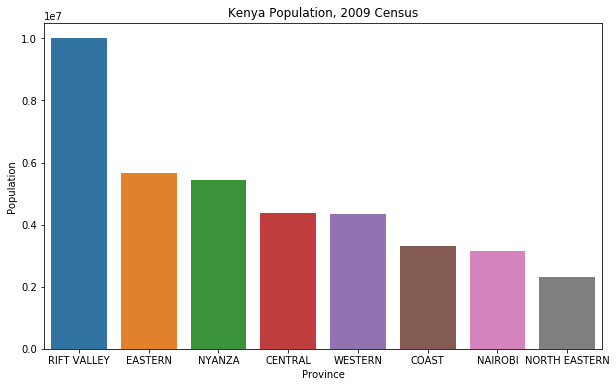

In [12]:
# Plot the distribution
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(provinceSummary['Province'],provinceSummary['pop'])
plt.title("Kenya Population, 2009 Census")
plt.xlabel("Province")
plt.ylabel("Population")
plt.show()

Interesting Rift Valley had the highest population. Almost twice the number the population of other provinces.

### Gender Distribution

In [13]:
genderDistribution = pd.pivot_table(pop_data,values=['Male','Female'],index='County',aggfunc=sum,fill_value=0,dropna=True)
genderDistribution = genderDistribution.reset_index()

# add % distribution
genderDistribution["% Male"] = round(genderDistribution["Male"]/
                                 (genderDistribution["Male"]+
                                  genderDistribution["Female"])*100,2)
genderDistribution

,County,Female,Male,% Male
0,CENTRAL,2230760,2152983,49.11
1,COAST,1668628,1656679,49.82
2,EASTERN,2884776,2783347,49.11
3,NAIROBI,1533139,1605230,51.15
4,NORTH EASTERN,1052109,1258648,54.47
5,NYANZA,2824977,2617734,48.10
6,RIFT VALLEY,4980343,5026462,50.23
7,WESTERN,2242907,2091375,48.25


Except for North Eastern where there are more male, the gender distribution is closely balanced

### What percentage of the population lived in urban areas in each of the provinces?

In [43]:
urbanDistribution = pd.pivot_table(pop_data,values=['Total'],index=['County','rural/urban'],
                                   aggfunc=sum,fill_value=0,dropna=True)
urbanDistribution = urbanDistribution.unstack(1).reset_index()
urbanDistribution = pd.DataFrame(urbanDistribution)
urbanDistribution.columns=['Province','Rural','Urban']
urbanDistribution = provinceSummary.merge(urbanDistribution,on='Province')
urbanDistribution['% Urban'] = round(urbanDistribution['Urban']/urbanDistribution['pop']*100,2)
urbanDistribution['% of KE\'s total Urban pop'] = round(urbanDistribution['Urban']/sum(urbanDistribution['Urban'])*100,2)
urbanDistribution


,Province,pop,% of total,Rural,Urban,% Urban,% of KE's total Urban pop
0,RIFT VALLEY,10006805,25.92,7535658,2471147,24.69,19.79
1,EASTERN,5668123,14.68,4444226,1223897,21.59,9.80
2,NYANZA,5442711,14.10,4054779,1387932,25.50,11.11
3,CENTRAL,4383743,11.35,2857526,1526217,34.82,12.22
4,WESTERN,4334282,11.23,3486680,847602,19.56,6.79
5,COAST,3325307,8.61,1862187,1463120,44.00,11.72
6,NAIROBI,3138369,8.13,0,3138369,100.00,25.13
7,NORTH EASTERN,2310757,5.98,1881666,429091,18.57,3.44


Nairobi population is purely urban centered and Coast province has the second highest percentage of urban population. North Eastern & Western have the lowest percentage of urban population. Looking at the overall contribution towards the Kenya's total urban population, Narobi still had the highest contribution followed by Rift Valley. North Eastern still had the least contribution.

## Map the Distribution

In [105]:
#Get the basemap for Kenya
m=Basemap(resolution='h',
         projection='merc',
         lat_0=0.467190,lon_0=37.895152,
         llcrnrlon=33.495772,llcrnrlat=-5.388090,
          urcrnrlon=41.694630,urcrnrlat=6.336591)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


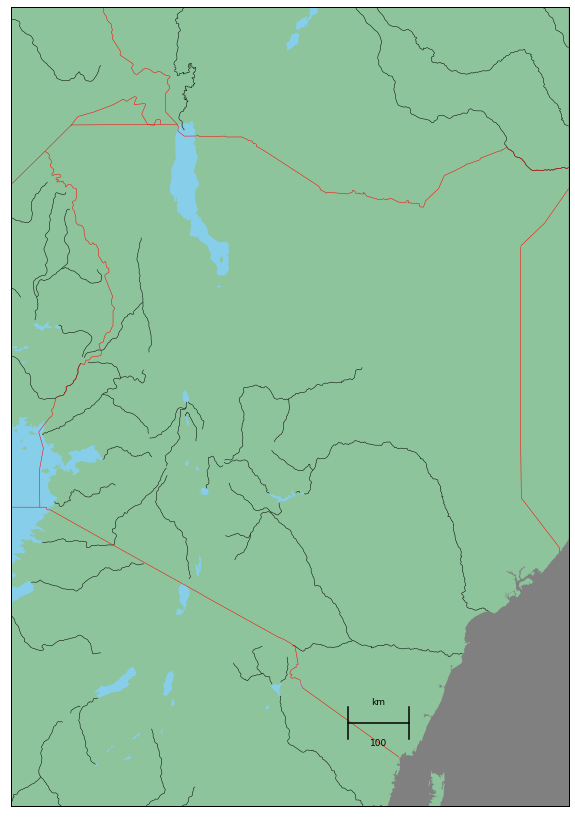

In [113]:
# plot the basemap
fig,ax = plt.subplots(figsize=(10,18))
m.drawmapboundary(fill_color='grey')
m.fillcontinents(color="#8dc49c",lake_color="skyblue")
#m.drawcoastlines(color='blue')
m.drawrivers()
m.drawcountries(color='red')
m.drawlsmask(land_color='0.8',ocean_color='w')
m.drawmapscale(38.8942,-4.1692,39.0620,-4.1563,100)
plt.show()

In [107]:
# Merge the District summary data with the shapefile
ke_pop_distribution = ke_district_boundaries.merge(pop_data,left_on='DISTNAME',right_on='District',how='left')

In [101]:
ke_pop_distribution.head()

,DISTNAME,geometry,District,rural/urban,Male,Female,Total,Households,Area_in_Sq_Km,_Household_Density_,Population_Density,Gender_Index,County,Location,Location_1,Province,OBJECTID
0,BARINGO,POLYGON ((36.27933883666992 0.6243004202842712...,BARINGO,Rural,65136.0,66242.0,131378.0,27309.0,2420.16,11.28,66268.91392,1.016980,RIFT VALLEY,"BARINGO, RIFT VALLEY Kenya\n",NaN,35.974159,106.0
1,BARINGO,POLYGON ((36.27933883666992 0.6243004202842712...,BARINGO,urban,14776.0,16197.0,30973.0,7629.0,57.78,536.06,16452.72863,1.096169,RIFT VALLEY,"BARINGO, RIFT VALLEY Kenya\n",NaN,35.974159,264.0
2,BOMET,POLYGON ((35.40040969848633 -0.651987552642822...,BOMET,Rural,145925.0,152672.0,298597.0,56084.0,824.56,68.02,152848.97320,1.046236,RIFT VALLEY,"BOMET, RIFT VALLEY Kenya\n",NaN,35.318993,136.0
3,BOMET,POLYGON ((35.40040969848633 -0.651987552642822...,BOMET,urban,48937.0,49570.0,98507.0,19238.0,227.01,433.93,49785.57200,1.012935,RIFT VALLEY,"BOMET, RIFT VALLEY Kenya\n",NaN,35.318993,294.0
4,BONDO,(POLYGON ((34.26028060913086 -0.34618946909904...,BONDO,Rural,53823.0,56643.0,110466.0,26023.0,497.69,52.29,56751.14563,1.052394,NYANZA,"BONDO, NYANZA Kenya\n",NaN,34.190644,74.0


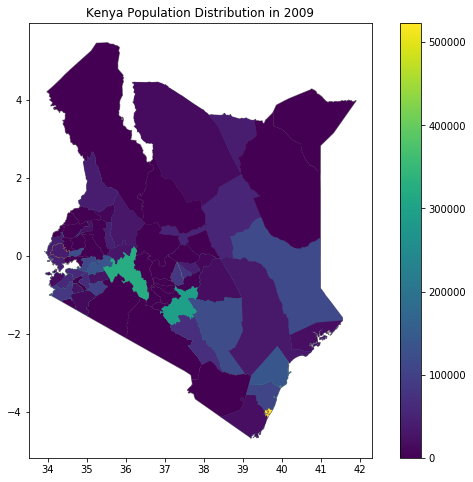

In [104]:
# Plot the Distribution
fig,ax=plt.subplots(figsize=(10,8))
ke_district_boundaries.plot(ax=ax,color='lightgrey',edgecolor='grey')
ke_pop_distribution.plot(ax=ax,column='Total',legend=True,legend_kwds={'loc':'center right'})
plt.title('Kenya Population Distribution in 2009')
plt.show()

In [103]:
ke_pop_distribution['Total'].describe()

count        84.000000
mean     139065.797619
std      121441.387813
min           0.000000
25%       43276.500000
50%      110358.000000
75%      219556.000000
max      523183.000000
Name: Total, dtype: float64